In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
lung = np.load('/media/HDD2TB_2/fits/l_'+str(5)+'.npz')['arr_0']

In [3]:
def plot_ct(image, z):
    H = np.array(image[:,:,z])  # added some commas and array creation code
    fig = plt.figure(figsize=(12, 12))
    
    ax = fig.add_subplot(111)
    plt.imshow(H, cmap='Greys_r')
    ax.set_aspect('equal')
    
    cax = fig.add_axes([0.12, 0.1, 0.93, 0.81])
    cax.get_xaxis().set_visible(False)
    cax.get_yaxis().set_visible(False)
    cax.patch.set_alpha(0)
    cax.set_frame_on(False)
    plt.colorbar(orientation='vertical')
    
    return plt.show()

In [4]:
nodules = np.load('/media/HDD2TB_2/fits/n_'+str(5)+'.npz')['arr_0']

In [6]:
for i in range(200):
    print(i, nodules[:,:,i].sum())

0 0
1 0
2 0
3 0
4 0
5 0
6 0
7 0
8 0
9 0
10 0
11 0
12 0
13 0
14 0
15 0
16 0
17 0
18 0
19 0
20 0
21 0
22 0
23 0
24 0
25 0
26 0
27 0
28 0
29 0
30 0
31 0
32 0
33 0
34 0
35 37
36 63
37 53
38 0
39 0
40 34
41 32
42 0
43 0
44 0
45 0
46 0
47 0
48 0
49 0
50 0
51 0
52 0
53 0
54 0
55 0
56 0
57 0
58 0
59 0
60 0
61 0
62 0
63 0


IndexError: index 64 is out of bounds for axis 2 with size 64

In [5]:
def plot_RB(image, z):
    fig = plt.figure(figsize=(12, 12))
    
    ax = fig.add_subplot(111)
    ax.set_title('Lung (blue), Nodule (red)')
    plt.imshow(image[:,:,z], cmap='seismic', vmin=-1, vmax=1)
    ax.set_aspect('equal')
    
    cax = fig.add_axes([0.12, 0.1, 0.95, 0.8])
    cax.get_xaxis().set_visible(False)
    cax.get_yaxis().set_visible(False)
    cax.patch.set_alpha(0)
    cax.set_frame_on(False)
    plt.colorbar(orientation='vertical')
    
    return plt.show()

1.0
0.0
(256, 255, 64)
1
0
(256, 255, 64)


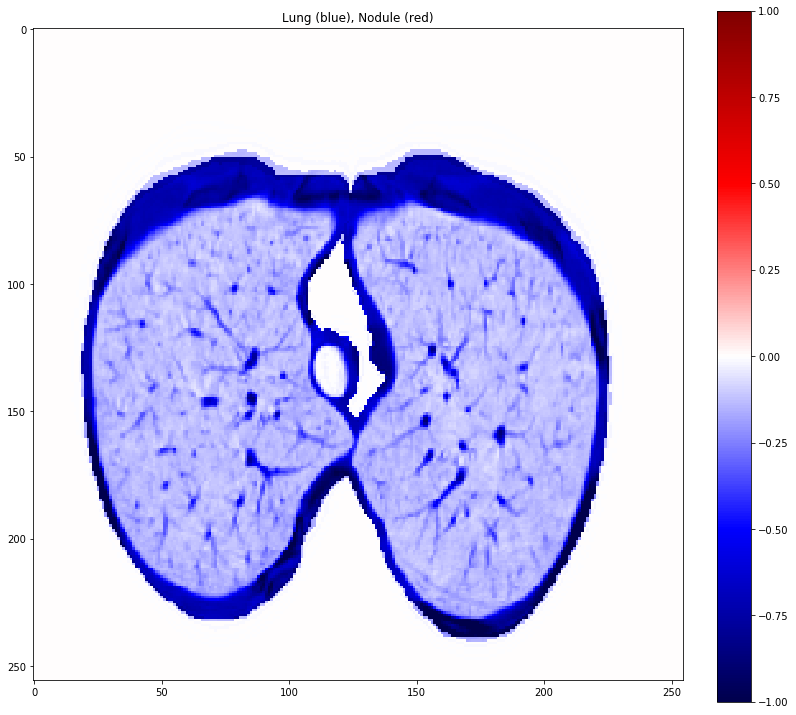

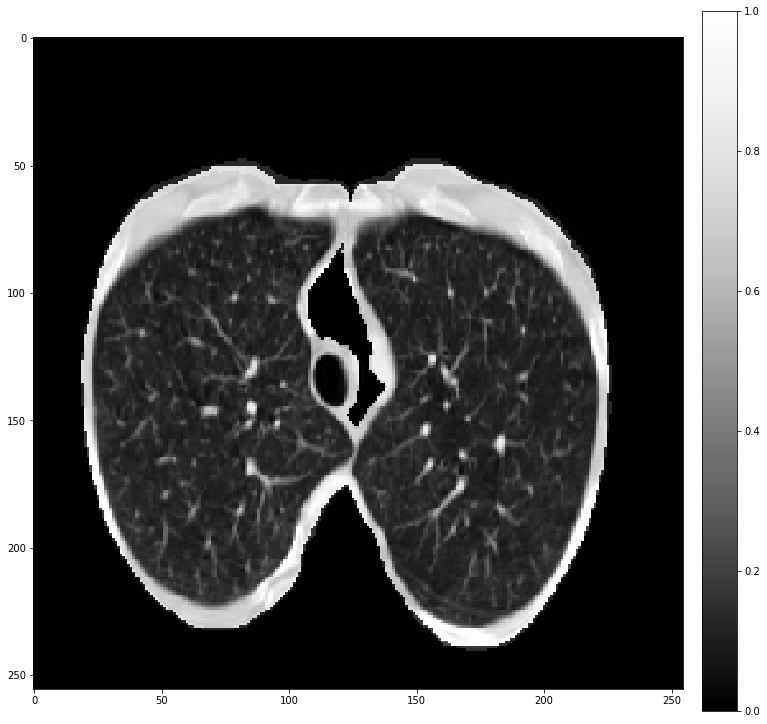

In [6]:
print(np.max(lung))
print(np.min(lung))
print(lung.shape)

print(np.max(nodules))
print(np.min(nodules))
print(nodules.shape)

plot_RB(nodules-lung, 50)
plot_ct(lung, 50)

In [10]:
import pylidc as pl

In [11]:
pid = 'LIDC-IDRI-0005'
scan = pl.query(pl.Scan).filter(pl.Scan.patient_id == pid).first()

In [12]:
vol = scan.to_volume()
print(vol.shape)

Loading dicom files ... This may take a moment.
(512, 512, 133)


In [13]:
nods = scan.cluster_annotations()

Loading dicom files ... This may take a moment.


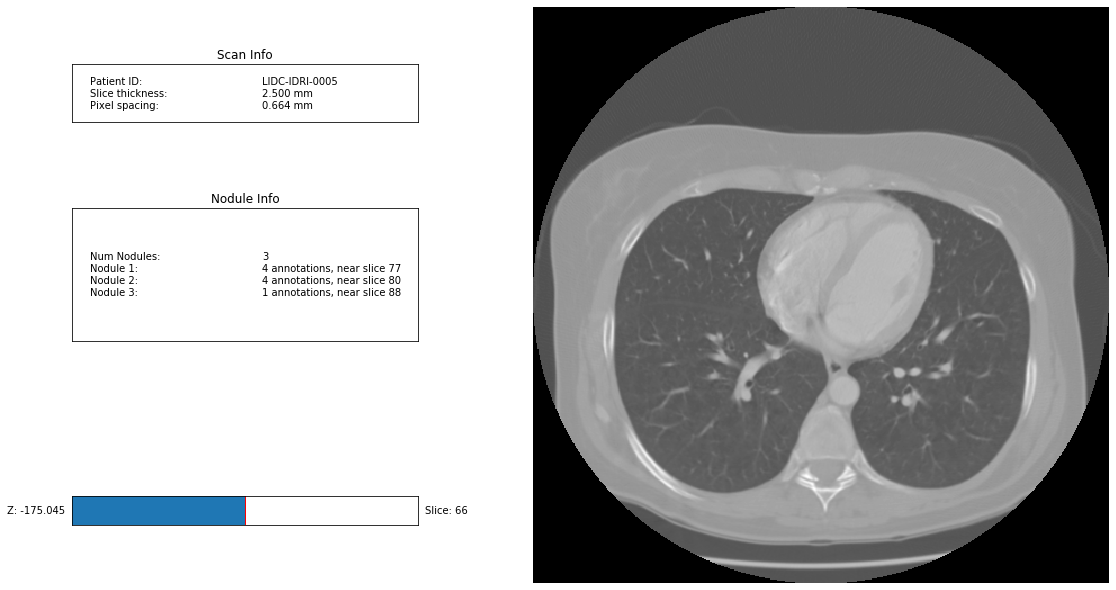

In [14]:
scan.visualize(annotation_groups=nods)

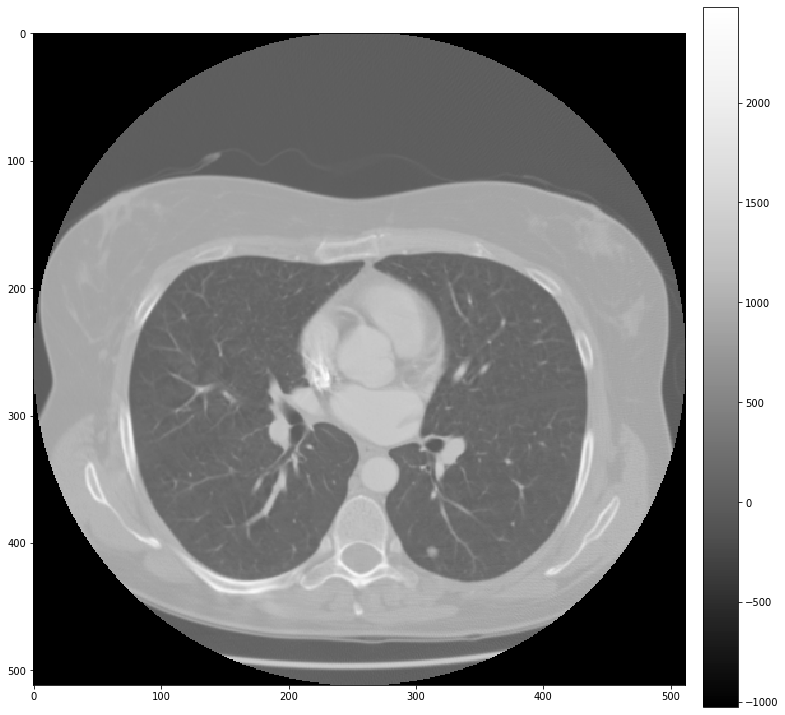

In [15]:
plot_ct(vol, 80)